In order to successfully complete this assignment, you must follow all the instructions in this notebook and upload your edited ipynb file to [D2L](http://d2l.msu.edu/) with your answers on or before **10:00am on Friday, October 8th**.

**BIG HINT:** Read the entire homework before starting.  

# Homework 2: Affine Transform





In [14]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import sympy as sym



---
<a name=Reading-in-example-image-files></a>
# 1.  (25pts) Linear Transform


In class, we talked about different types of transformations: rotation, shearing, translation, scaling.
In this problem, we focus on the two dimensional case. Then we know that the transformation can be expressed as a $2\times 3$ matrix, which has 6 unknowns. 

Assume that a linear transform maps $(1,1)$ to $(2,2)$, $(4,1)$ to $(8,2)$, and $(1,4)$ to $(-1,5)$. We need to find  the $2\times 3$ matrix $M$ to express the transform.

$$\begin{bmatrix}x_{\mbox{target}}\\y_{\mbox{target}}\end{bmatrix}=\begin{bmatrix}m_{11}&m_{12}&m_{13}\\m_{21}&m_{22}&m_{23}\end{bmatrix}\begin{bmatrix}x\\y\\1\end{bmatrix}$$

The following code shows the three points before the mapping (in green) and the three target points after the mapping (in red).

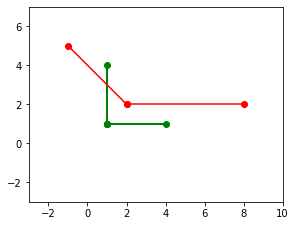

In [15]:
# Define some points
x = [1.0, 4.0, 1.0, 1.0, 1.0]
y = [1.0, 1.0, 1.0, 4.0, 1.0]
con = [ 1.0 for i in range(len(x))] 
p = np.matrix([x,y,con])

fig = plt.figure(figsize=plt.figaspect(0.4))
ax1 = fig.add_subplot(1, 2, 1)

#Plot Points
plt.scatter(x,y, color='green');
plt.plot(x,y, color='green');

plt.axis('scaled');
plt.axis([-3,10,-3,7]);

x2 = [2.0, 8.0, 2.0, -1.0]
y2 = [2.0, 2.0, 2.0, 5.0]

#Plot Points after transform
plt.scatter(x2,y2, color='red');
plt.plot([x2[0],x2[1]],[y2[0],y2[1]], color='red');
plt.plot([x2[0],x2[3]],[y2[0],y2[3]], color='red');  

&#9989;  **<font color=red>QUESTION 1a:</font>** (5pts)  Write down a system of $6$ equations for the $6$ unknowns in the matrix $M$. Put down the system in the row form.

**$$m_{11} + m_{12} + m_{13} = 2$$**
**$$4m_{11} + m_{12} + m_{13} = 8$$**
**$$m_{11} + 4m_{12} + m_{13} = -1$$**
**$$m_{21} + m_{22} + m_{23} =2$$**
**$$4m_{21} + m_{22} + m_{23} =2$$**
**$$m_{21} + 4m_{22} + m_{23} =5$$**

&#9989;  **<font color=red>QUESTION 1b:</font>** (10pts)  Use Python to find the 6 values in the matrix $M$ based on the above system of equations, and store them in a $2\times 3$ `numpy.matrix` variable named `M`.

In [16]:
##Edit this cell to answer the question.
#The comment part was the previous code gave me an error but the answer given was correct.
#E = np.matrix([[1,1,1,0,0,0,2],[0,0,0,1,1,1,2],[4,1,1,0,0,0,8],[0,0,0,4,1,1,2],[1,4,1,0,0,0,-1],[0,0,0,1,4,1,5]])
#RREF = sym.Matrix(E).rref()[0]
#M = np.linalg.solve(E,RREF)
A = np.matrix([[1,1,1,0,0,0],[0,0,0,1,1,1],[4,1,1,0,0,0],[0,0,0,4,1,1],[1,4,1,0,0,0],[0,0,0,1,4,1]])
b = np.matrix([[2,2,8,2,-1,5]])
X = np.linalg.solve(A,b.T)
#M = np.matrix([[RREF[0,6],RREF[1,6],RREF[2,6]],[RREF[3,6],RREF[4,6],RREF[5,6]]])
M = X.reshape(2,3)
sym.Matrix(M)

Matrix([
[2.0, -1.0, 1.0],
[0.0,  1.0, 1.0]])

In [17]:
from answercheck import checkanswer
checkanswer.matrix(M,'d1ab6edd7398746076716cd92d9096db');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 2. -1.  1.]
 [ 0.  1.  1.]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 1c:</font>** (5pts)  Given the transform matrix $M$, what is the resulting point of $(4,4)$ after the transform?  Use matrix-vector multiplication to find the resulting point and store it in ```y4``` as a  $2\times 1$ ```numpy.matrix```.  Check that the resulting four end points form a parallellogram by showing that ```y4-y3=y2-y1``` (see the code provided in the cell).

In [18]:
##Start your coding###
y4 = np.matrix(M*(np.matrix([4,4,1]).T))
###End your coding###
y1 = np.matrix([[2],[2]])
y2 = np.matrix([[8],[2]])
y3 = np.matrix([[-1],[5]])
np.allclose(y4-y3,y2-y1)
sym.Matrix(y4)

Matrix([
[5.0],
[5.0]])

In [19]:
from answercheck import checkanswer
checkanswer.vector(y4,'5d193a412417bf8415160109117d9b6b');


    Trying to convert to a column vector using ```A = A.T```.

Testing [[5. 5.]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 1d:</font>** (5pts) The linear transform can be expressed as the product of rotation, shearing, translation, and scaling transformation matrices. Use the following interactive tool to find the corresponding coefficients for the transformation matrix.

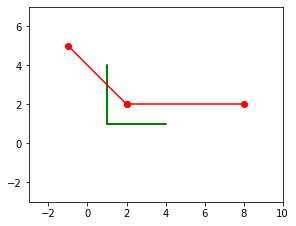

In [20]:
from ipywidgets import interact,interact_manual

def affine_image(angle=0.0,scale=1.0,dx=0,dy=0, shx=0, shy=0):
    theta = -angle/180  * np.pi
    
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='green')
    
    S = np.matrix([[scale,0,0], [0,scale,0], [0,0,1]])
    SH1 = np.matrix([[1,shx,0], [0,1,0], [0,0,1]])
    SH2 = np.matrix([[1,0,0], [shy,1,0], [0,0,1]])
    T = np.matrix([[1,0,dx], [0,1,dy], [0,0,1]])
    R = np.matrix([[np.cos(theta),-np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]])
    
    #Full Transform
    FT = T*R*SH2*SH1*S;
    #Apply Transforms
    p2 =  FT*p;
    
    #Target picture:
    x2 = [2.0, 8.0, 2.0, -1.0]
    y2 = [2.0, 2.0, 2.0, 5.0]
    plt.plot([x2[0],x2[1]],[y2[0],y2[1]], color='red');
    plt.plot([x2[0],x2[3]],[y2[0],y2[3]], color='red');
    
    #Plot Output
    plt.plot(p2[0,:].tolist()[0],p2[1,:].tolist()[0], color='blue')
    plt.axis('equal')
    plt.axis([-3,10,-3,7])
    ax = plt.gca()
    plt.show()
    
    return sym.Matrix(FT)

In [171]:
interact(affine_image, angle=(-180,180), scale_manual=(0.01,2), dx=(-5,15,0.5), dy=(-15,15,0.5), shx = (-1,1,0.1), shy = (-1,1,0.1)); ##TODO: Modify this line of code

interactive(children=(IntSlider(value=0, description='angle', max=180, min=-180), FloatSlider(value=1.0, descr…

In [21]:
# Put your answer here
angle = -45
scale = 1.40
dx  = 1
dy  = 1
shx = 0
shy = -1


---
<a name=Design-Transforms></a>
# 2.  (20pts) Combined Transforms

In this problem, we will consider two types of transformations: rotation and shearing. When the translation is not involved, we can use $2\times 2$ matrices to describe them. In class, we showed that changing the order of transformation matrices may get a different transform, since matrix multiplication is not commutative.

&#9989;  **<font color=red>QUESTION 2a:</font>** (6pts)  Use python code  to construct the following two $2\times 2$ transformation matrices: 
+ Rotation matrix `R` with angle `degree`$=60^\circ$ (rotate counterclockwise)
+ Shearing matrix `SH` with parameter `shx`$=1.0$ (the $y$-component does not change)

In [22]:
#finish the code for the two matrices
degrees = 60
x = -degrees/180 * np.pi
cos_x = np.cos(x)
sin_x = np.sin(x)
R = np.matrix([[cos_x,sin_x],[-sin_x, cos_x]])

shx = 1. # shear in the x-direction
SH  = np.matrix([[1,shx],[0,1]])

print(R)
print(SH)

[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]
[[1. 1.]
 [0. 1.]]


In [23]:
from answercheck import checkanswer
checkanswer.matrix(R,'163b8f36e3a3f5fa07b4e6728d2b22a6');

Testing [[ 0.5     -0.86603]
 [ 0.86603  0.5    ]]
Answer seems to be correct



In [24]:
from answercheck import checkanswer
checkanswer.matrix(SH,'afc5f3df05880c6922329d836538dce9');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[1. 1.]
 [0. 1.]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 2b:</font>** (4pts) Print the product of the two matrices `SH*R` and `R*SH`. Are they the same?

In [25]:
SHR = SH*R
RSH = R*SH
print(sym.Matrix(SHR))
print(sym.Matrix(RSH))
print(SHR == RSH)

Matrix([[1.36602540378444, -0.366025403784438], [0.866025403784439, 0.500000000000000]])
Matrix([[0.500000000000000, -0.366025403784438], [0.866025403784439, 1.36602540378444]])
[[False  True]
 [ True False]]


**No, the answer is not same, $$SH*R \neq R*SH$$**

&#9989;  **<font color=red>QUESTION 2c:</font>** (5pts)  Given two $2\times2$ matrices $A$ and $B$ 
$$
A=\begin{bmatrix}a & b \\ c& d\end{bmatrix}\qquad B=\begin{bmatrix}e & f \\ g& h\end{bmatrix}
$$
 When their product does not change if the order is switched, i.e.,
$$
\begin{bmatrix}a & b \\ c& d\end{bmatrix}\begin{bmatrix}e & f \\ g& h\end{bmatrix}  =\begin{bmatrix}e & f \\ g& h\end{bmatrix} \begin{bmatrix}a & b \\ c& d\end{bmatrix}  
$$
we have
$$
\begin{align*}
ae+bg  = ae+cf\\
af+bh=be+df\\
ce+dg=ag+ch\\
cf+dh=bg+dh
\end{align*}
$$

The first and the fourth equations hold when 
$$ cf=bg$$
The second and third equations hold when 
$$
\begin{align*}
(a-d)f = b(e-h)\\
(a-d)g= c(e-h)
\end{align*}
$$

Explain why `SH*R` is not the same as `R*SH` from the previous question.

In [26]:
a = SH[0,0]
b = SH[0,1]
c = SH[1,0]
d = SH[1,1]
sym.Matrix(SH)

Matrix([
[1.0, 1.0],
[0.0, 1.0]])

In [27]:
e = R[0,0]
f = R[0,1]
g = R[1,0]
h = R[1,1]
sym.Matrix(R)

Matrix([
[              0.5, -0.866025403784439],
[0.866025403784439,                0.5]])

Now, let us define the condition for second and third equations:

$$
\begin{align*}
(a-d)f = b(e-h)\\
(a-d)g= c(e-h)
\end{align*}
$$

In [28]:
(a-d)*f == b*(e-h)
(a-d)*g == c*(e-h)

True

The first and the fourth equations hold when 
$$ cf=bg$$

In [29]:
c*f == b*g

False

**`SH*R and R*SH` are not equal because it violates the condition $cf = bg$ from the code `In[25]`.**

&#9989;  **<font color=red>QUESTION 2d:</font>** (5pt) Find another pair of two transform matrices from the six transformation matrices talked about in class (Rotation, Scale, Translation, Shear_x, Shear_y, Reflection) such that their order matters when applying the transform. 

In [30]:
shx = 0.5 # shear in the x-direction

SH  = np.matrix([[1,0],[shx,1]])

angle = np.pi/4
R = np.matrix([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]);

A = SH * R
B = R * SH
print(A)
print(B)
print(A == B)

[[ 0.70710678 -0.70710678]
 [ 1.06066017  0.35355339]]
[[ 0.35355339 -0.70710678]
 [ 1.06066017  0.70710678]]
[[False  True]
 [ True False]]


As it can be seen that ${A}\neq{B}$ becuase the order in which matrix ```SH``` and ```R``` are multiplied matters.

---
<a name=Stitch-Images-together></a>
# 3.  (30pts) Inverse Transform



Again we consider a tranform without the translation. However, we consider it in three dimensions now.

&#9989;  **<font color=red>QUESTION 3a:</font>** (9pts)  Use python code to construct the following three $3\times 3$ transformation matrices: 
+ Rotation matrix `Rx` with angle `degreex`$=60^\circ$ (rotate about x axis)
+ Rotation matrix `Rz` with angle `degreez`$=45^\circ$ (rotate about z axis)
+ Shearing matrix `SH` with parameter `sh`$=1.0$ (adding the $z$ component to the $x$ component)

In [31]:
## Finish the code in this cell.
degreex = 60
angle = degreex/180*np.pi
Rx = np.matrix([[1,0,0],[0,np.cos(angle), -np.sin(angle)], [0,np.sin(angle),np.cos(angle)]])

degreez = 45
angle = degreez/180*np.pi
Rz = np.matrix([[np.cos(angle), -np.sin(angle),0], [np.sin(angle), np.cos(angle),0],[0,0,1]])

sh = 1.0 
SH  = np.matrix([[1,0,sh],[0,1,0],[0,0,1]])

In [32]:
checkanswer.matrix(Rx,'2c299ea2d9eeca197f415cacd4a4efe6');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 1.       0.       0.     ]
 [ 0.       0.5     -0.86603]
 [ 0.       0.86603  0.5    ]]
Answer seems to be correct



In [33]:
checkanswer.matrix(Rz,'05fd5fa50be0b9301c392221a601a1b2');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]
Answer seems to be correct



In [34]:
checkanswer.matrix(SH,'c86ada68aeb78dd10005d7f286bff51f');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[1. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 3b:</font>** (6pts)  Find the inverse tranform matrices for the three matrices and call them `Rx_inv`, `Rz_inv`, and `SH_inv`, respectively. Feel free to use your intuition based on what the transforms do to find the inverses. Check that the matrices you found are indeed the inverses you are looking for by multiplying each matrix with its inverse.

In [35]:
##complete the code in this cell

Rx_inv = np.linalg.inv(Rx)

Rz_inv = np.linalg.inv(Rz)

SH_inv = np.linalg.inv(SH)


For a matrix to be its inverse, the multiplication of the matrix and the inverse should be equal to the matrix of that size. Let's check if ```Rx_inv```, ```Rz_inv```, ```SH_inv``` are the inverse of matrices ```Rx```, ```Rz```, and ```SH``` respectively.

In [36]:
# Checking to see Rx_inv is inverse of Rx
print(Rx_inv*Rx)
print(Rz_inv*Rz)
print(SH_inv*SH)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.48741681e-17]
 [ 0.00000000e+00  4.06369831e-17  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


As it can be seen that, if we ignore rounding error, the multiplication of all the inverse is equal to the identity matrix and that proves that indeed they are the inverse of the matrices.

In [37]:
checkanswer.matrix(Rx_inv,'571417b2efd409fcc81fbcd60a1f8765');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 1.       0.       0.     ]
 [ 0.       0.5      0.86603]
 [ 0.      -0.86603  0.5    ]]
Answer seems to be correct



In [38]:
checkanswer.matrix(Rz_inv,'96491aabf1a23f1090aeea4596f579df');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 0.70711  0.70711  0.     ]
 [-0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]
Answer seems to be correct



In [39]:
checkanswer.matrix(SH_inv,'b8117800247011f0808fa99eb73e8038');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 1.  0. -1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 3c:</font>** (5pts)  Combine the three matrices into one transfrom matrix. You can choose any order for the three matrices. Then use the `rref` function in `sympy` to find the inverse of the matrix. (Hint: you can use `numpy.concatenate` to join two $3\times 3$ matrices into one $3\times 6$ matrix.)

In [40]:
### Put your answer here
M = Rx*Rz*SH
A = np.concatenate((M,np.eye(3)),axis=1)
M_INV = sym.Matrix(A).rref()[0]
M_INV = M_INV[:,3:6]
print(M_INV)

Matrix([[0.707106781186547, 1.21957879437771, 0.112372435695794], [-0.707106781186547, 0.353553390593274, 0.612372435695794], [7.85046229341887e-17, -0.866025403784439, 0.500000000000000]])


&#9989;  **<font color=red>QUESTION 3d:</font>** (5pts)  As we know, if $A$, $B$ and $C$ are invertible, we have 
$$(ABC)^{-1}=C^{-1}B^{-1}A^{-1}.$$
Based on this rule, use the inverse transformation matrices to construct the inverse of $M$ and check whether it is the same as you obtained in the previous question.

In [41]:
### Put your answer here
M_INV_D = np.matrix(SH_inv*Rz_inv*Rx_inv)
print(M_INV_D)

[[ 0.70710678  1.21957879  0.11237244]
 [-0.70710678  0.35355339  0.61237244]
 [ 0.         -0.8660254   0.5       ]]


In [42]:
A = np.matrix(M_INV_D - M_INV)
print(A)

[[1.11022302462516e-16 -2.22044604925031e-16 -8.32667268468867e-17]
 [0 0 1.11022302462516e-16]
 [-7.85046229341887e-17 2.22044604925031e-16 1.11022302462516e-16]]


**As it can be seen that M_INV which is found using rref method to find the inverse of matrix $M$. The resulting matrix M_INV which is $(ABC)^{-1}$. Then the inverse of the three matrices were multiplied to give matrix M_INV_D which was found to be equal to the Question 3c. To get it equal, we subtracted, M_INV_D-M_INV and it gave us a matrix $A$ which is a zero matrix of size ${3}\times{3}$ which shows that M_INV=M_INV_D despite small python error.**

&#9989;  **<font color=red>QUESTION 3e:</font>** (5pts)  Suppose that under this transformation matrix $M$ we know that some point ends up at (1,1,1). Where was this point before the transformation matrix was applied?

In [43]:
### Put your answer here
A = M_INV_D * np.matrix([[1,1,1]]).T
print(A)

[[ 2.03905801]
 [ 0.25881905]
 [-0.3660254 ]]


This matrix was at point $(2.039,0.259, -0.366)$ before transformation matrix $M$ was applied.



---
<a name=Build-an-combined-affine-transform-function.></a>
# 4. (25 points) Cryptography

In this problem, we use an invertible matrix to encode a message. There will be two matrices: encoding matrix and decoding matrix. 

Assume that we want to send the following message 
$$\mbox{EXAM AT TWO}$$
We first assign a number to each letter of the alphabet. For example, we can assign 1 to A, 2 to B, and so on. In addition, we assign 27 to the space between two words. So this message can be decribed as a vector 
$$[5,24,1,13,27,1,20,27,20,23,15].$$
Then we design an encoding matrix. For this example, we let the encoding matrix be 
$$\begin{bmatrix}1&2&1\\2&3&1\\-2&0&1\end{bmatrix}.$$
Because the encoding matrix has three rows and three columns, we break the message vector into many vectors of three elements. If the number is not divided by three, we add additional spaces at the end of the message. Therefore we have the new messge vector
$$[5,24,1],[13,27,1],[20,27,20],[23,15,27],$$
which has 4 blocks.

For the encoding part, we just apply matrix-vector multiplication block by block. 

&#9989;  **<font color=red>QUESTION 4a:</font>** (5pts) Use python code to encode the message and store the output vector into a matrix named `Message_encoded` with three rows, and each column corresponds to the encoded message of three characters in one block.

In [44]:
encode = np.matrix([[1,2,1],[2,3,1],[-2,0,1]])
message = np.matrix([[5,24,1],[13,27,1],[20,27,20],[23,15,27]]).T
Message_encoded = encode * message

In [45]:
checkanswer.matrix(Message_encoded,'bce1de1510a6ed5cd37f568734f0dd1c');


    Trying to convert to float using ```A = A.astype(float)```.

Testing [[ 54.  68.  94.  80.]
 [ 83. 108. 141. 118.]
 [ -9. -25. -20. -19.]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 4b:</font>** (5pts) Find the decoding matrix that will decode the encoded message and store it as `Decode`.

In [46]:
##Put your code here
inv = np.linalg.inv(encode)
Decode = inv
sym.Matrix(Decode)

Matrix([
[ 3.0, -2.0, -1.0],
[-4.0,  3.0,  1.0],
[ 6.0, -4.0, -1.0]])

In [47]:
checkanswer.matrix(Decode,'468082f8684066db43875310bd3d1f1c');

Testing [[ 3. -2. -1.]
 [-4.  3.  1.]
 [ 6. -4. -1.]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 4c:</font>** (5pts) Use the decoding matrix `Decode` to decode the message you just encoded. 

In [48]:
#Put your code here
Decoded = Decode * Message_encoded 
#Decoded = Decoded.T
print(Decoded)

[[ 5. 13. 20. 23.]
 [24. 27. 27. 15.]
 [ 1.  1. 20. 27.]]


&#9989;  **<font color=red>QUESTION 4d:</font>** (5pts) Use the decoding matrix `Decode` to decode the following message
$$[71,100,-1,28,43,-5,84,122,-11,63,98,-27,69,102,-12,88,126,-3]$$

In [49]:
#Put your answer here
decode_matrix = np.matrix([[71,100,-1],[28,43,-5],[84,122,-11],[63,98,-27],[69,102,-12],[88,126,-3]]).T
Decoded = Decode * decode_matrix
print(Decoded)

[[14.  3. 19. 20. 15. 15.]
 [15. 12. 19. 15. 18. 23.]
 [27.  1. 27. 13. 18. 27.]]


The message would be:
**NO CLASS TOMORROW**

&#9989;  **<font color=red>QUESTION 4e:</font>** (5pts) Assume that the encode matrix is implemented in a machine, but you forgot the corresponding decode matrix. You only know that the encode matrix is $3\times 3$. In this case, you can still find the encode matrix using the pairs of original message and encoded message. How many pairs do you need to recover this matrix? Explain your answer

**You would need three pairs of input and output matrices. As we have a ${3}\times{3}$ encode matrix, we need three matrix. Suppose we have a encode matrix:- $Encoded = \begin{bmatrix}r&s&t\\u&v&w\\x&y&z\end{bmatrix}.$ We know that encode is multiplied by the three pairs of input matrix, let it be:- $I1 = \begin{bmatrix}1&0&0\end{bmatrix}$, $I2 = \begin{bmatrix}0&1&0\end{bmatrix}$, and $ I3 =\begin{bmatrix}0&0&1\end{bmatrix}$. If we have, ${I1}\times{Encoded}$, ${I2}\times{Encoded}$, and ${I3}\times{Encoded}$, our output would be $r,u,x$,$s,v,y$, and $t,w,z$. With this output, we can get the desire matrix.**

---------
### Congratulations, we're done!
